In [1]:
import tensorflow as tf
from keras.models import load_model

In [2]:
loaded_model = load_model("Alex - Net.keras")

In [3]:
from tensorflow.keras.models import Model

def remove_last_5_layers(model):
    new_model = Model(inputs=model.input, outputs=model.layers[-6].output)  # index 9 is the last layer to keep
    return new_model

# Remove last 5 layers
extractor_model = remove_last_5_layers(loaded_model)


In [4]:
extractor_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120

In [5]:
# Define a function to extract features
def extract_features(input_image):
    # Extract features using the modified model
    features = extractor_model.predict(input_image)
    return features

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('Osteoporosis Knee X-ray')

room_types = os.listdir('Osteoporosis Knee X-ray')
print (room_types) 

print("categories of disease: ", len(dataset_path))

['normal', 'osteopenia', 'osteoporosis']
categories of disease:  3


In [7]:
rooms = []
for item in room_types:
    all_rooms = os.listdir('Osteoporosis Knee X-ray' + '/' +item)

    for room in all_rooms:
        
        rooms.append((item, room[:room.find('.')], str('Osteoporosis Knee X-ray' + '/' +item) + '/' + room))
#         print(rooms)

In [8]:
import pandas as pd
data = pd.read_csv('osteo-preprossed.csv')
data = data[:-1]
data.tail()

,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Diabetic,Hypothyroidism,...,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Obesity,Diagnosis
234,OP151,yes,male,54.0,0.0,1.69,68.0,no,no,no,...,no,yes,6.0,normal,no,-2.02,-2.45,23.808690,normal weight,osteopenia
235,OP152,yes,female,56.0,0.0,1.54,80.0,no,no,yes,...,no,yes,0.2,normal,"scizerian, b.p",-1.97,-1.34,33.732501,obesity,osteopenia
236,OS49,yes,male,55.0,0.0,1.53,63.0,no,no,no,...,no,no,6.0,normal,heart,-2.99,-2.42,26.912726,over weight,osteoporosis
237,OP153,yes,male,49.0,0.0,1.67,88.0,no,no,no,...,no,yes,0.5,normal,"G.B rem, fatty liver",-1.72,-1.21,31.553659,obesity,osteopenia
238,OP154,yes,female,56.0,48.0,1.52,68.0,no,no,no,...,no,yes,0.2,"low fats,proteins","G.B& uterus rem, intestine surgery",-2.01,-1.13,29.432133,overweight,osteopenia


In [9]:
osteo_df = pd.DataFrame(data=rooms, columns=['Y', 'Patient Id', 'images'])
print(osteo_df)
osteo_df.shape

                Y Patient Id                                         images
0          normal         N1         Osteoporosis Knee X-ray/normal/N1.JPEG
1          normal        N10        Osteoporosis Knee X-ray/normal/N10.JPEG
2          normal        N11        Osteoporosis Knee X-ray/normal/N11.JPEG
3          normal        N12        Osteoporosis Knee X-ray/normal/N12.JPEG
4          normal        N13         Osteoporosis Knee X-ray/normal/N13.jpg
..            ...        ...                                            ...
234  osteoporosis        OS5  Osteoporosis Knee X-ray/osteoporosis/OS5.JPEG
235  osteoporosis        OS6  Osteoporosis Knee X-ray/osteoporosis/OS6.JPEG
236  osteoporosis        OS7  Osteoporosis Knee X-ray/osteoporosis/OS7.JPEG
237  osteoporosis        OS8   Osteoporosis Knee X-ray/osteoporosis/OS8.jpg
238  osteoporosis        OS9   Osteoporosis Knee X-ray/osteoporosis/OS9.jpg

[239 rows x 3 columns]


(239, 3)

In [10]:
data.shape

(239, 25)

In [11]:
images, Y = osteo_df['images'] , osteo_df['Y']

In [12]:
import cv2
import numpy as np

def preprocess_images(images):
    processed_images = []
    for img in images:
        img = cv2.imread(img)
        # Resize image to (227, 227)
        resized_img = cv2.resize(img, (227, 227))
        # Preprocess the image (normalize pixel values to range [0, 1])
        resized_img = resized_img / 255.0  
        processed_images.append(resized_img)
    return np.array(processed_images)

# Preprocess train and test images
images_processed = preprocess_images(images)


In [13]:
images_processed.shape

(239, 227, 227, 3)

In [14]:
x_features = extract_features(images_processed)


8/8 [==============================] - 2s 212ms/step


In [15]:
x_features

array([[0.        , 0.        , 0.01446307, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01622285, 0.        , ..., 0.06927067, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.29952946, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00191051, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02781873, 0.        , ..., 0.01726131, 0.        ,
        0.        ],
       [0.        , 0.02781873, 0.        , ..., 0.01726131, 0.        ,
        0.        ]], dtype=float32)

In [16]:
x_features = np.array(x_features, dtype=np.float32)


In [17]:
x_features.shape

(239, 9216)

In [18]:
x_features.dtype

dtype('float32')

In [19]:
min_val = np.min(x_features)
max_val = np.max(x_features)

normalized_features = (x_features - min_val) / (max_val - min_val)

In [20]:
final_data = data.sort_values(by='Patient Id')


In [21]:
final_data

,Patient Id,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Diabetic,Hypothyroidism,...,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Obesity,Diagnosis
14,N1,yes,male,40.0,0.0,1.61544,74.0,no,no,no,...,no,yes,1.0,normal,no,-0.61,-0.34,28.356332,over weight,normal
56,N10,yes,female,30.0,0.0,1.55448,73.0,no,no,no,...,no,no,2.0,normal,no,-0.58,-0.51,30.210129,obesity,normal
57,N11,yes,female,35.0,0.0,1.52400,68.0,no,no,yes,...,no,no,2.0,normal,no,-0.81,-0.67,29.277836,over weight,normal
59,N12,yes,male,25.0,0.0,1.73736,64.0,no,no,no,...,no,no,3.0,normal,hernia,-0.31,-0.36,21.203148,normal weight,normal
63,N13,yes,male,39.0,0.0,1.73736,65.0,no,no,no,...,no,no,2.0,normal,no,-0.48,-0.41,21.534447,normal weight,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,OS5,yes,female,70.0,48.0,1.52400,77.0,no,no,no,...,no,no,0.2,normal,B.P,-2.99,-2.39,33.152844,obesity,osteoporosis
46,OS6,yes,male,76.0,0.0,1.70688,90.0,yes,no,no,...,no,no,0.2,normal,no,-2.57,-0.71,30.891325,obesity,osteoporosis
54,OS7,yes,male,70.0,0.0,1.67640,80.0,no,yes,no,...,no,no,0.2,low sugar,B.P,-2.56,-0.98,28.466540,over weight,osteoporosis
71,OS8,no,male,55.0,0.0,1.82880,92.0,no,no,no,...,no,yes,5.0,normal,no,-2.50,-2.45,27.507771,over weight,osteoporosis


In [22]:
x_numeric_features = final_data.drop(labels = ["Patient Id","Diagnosis"],axis = 1)

In [23]:
categorical_col = x_numeric_features.select_dtypes(include=['object']).columns

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_col:
    x_numeric_features[col] = le.fit_transform(x_numeric_features[col])
x_numeric_features

,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Diabetic,Hypothyroidism,Number of Pregnancies,...,History of Fracture,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Obesity
14,1,1,40.0,0.0,1.61544,74.0,0,0,0,0.0,...,36,0,1,1.0,21,61,-0.61,-0.34,28.356332,2
56,1,0,30.0,0.0,1.55448,73.0,0,0,0,0.0,...,36,0,0,2.0,21,61,-0.58,-0.51,30.210129,1
57,1,0,35.0,0.0,1.52400,68.0,0,0,1,1.0,...,36,0,0,2.0,21,61,-0.81,-0.67,29.277836,2
59,1,1,25.0,0.0,1.73736,64.0,0,0,0,0.0,...,36,0,0,3.0,21,55,-0.31,-0.36,21.203148,0
63,1,1,39.0,0.0,1.73736,65.0,0,0,0,0.0,...,36,0,0,2.0,21,61,-0.48,-0.41,21.534447,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,1,0,70.0,48.0,1.52400,77.0,0,0,0,6.0,...,36,0,0,0.2,21,0,-2.99,-2.39,33.152844,1
46,1,1,76.0,0.0,1.70688,90.0,1,0,0,0.0,...,31,0,0,0.2,21,61,-2.57,-0.71,30.891325,1
54,1,1,70.0,0.0,1.67640,80.0,0,1,0,0.0,...,36,0,0,0.2,13,0,-2.56,-0.98,28.466540,2
71,0,1,55.0,0.0,1.82880,92.0,0,0,0,0.0,...,36,0,1,5.0,21,61,-2.50,-2.45,27.507771,2


In [25]:
x_numeric_features.describe()

,Joint Pain:,Gender,Age,Menopause Age,height (meter),Weight (KG),Smoker,Diabetic,Hypothyroidism,Number of Pregnancies,...,History of Fracture,Dialysis:,Family History of Osteoporosis,Maximum Walking distance (km),Daily Eating habits,Medical History,T-score Value,Z-Score Value,BMI:,Obesity
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.991632,0.447699,51.096234,15.650628,1.585474,69.054393,0.171548,0.050209,0.142259,1.786611,...,32.426778,0.004184,0.276151,1.919247,18.761506,48.962343,-1.838117,-1.330377,27.595653,1.251046
std,0.091285,0.498301,12.624304,21.697701,0.095947,9.594355,0.377778,0.218835,0.350049,2.021021,...,9.486051,0.064685,0.448031,1.985231,5.254612,22.038227,0.685146,0.675651,4.050987,0.847481
min,0.000000,0.000000,17.000000,0.000000,1.371600,39.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.990000,-2.990000,16.139658,0.000000
25%,1.000000,0.000000,45.000000,0.000000,1.520000,63.000000,0.000000,0.000000,0.000000,0.000000,...,36.000000,0.000000,0.000000,0.500000,21.000000,36.500000,-2.325000,-1.830000,24.940247,1.000000
50%,1.000000,0.000000,50.000000,0.000000,1.570000,69.000000,0.000000,0.000000,0.000000,1.000000,...,36.000000,0.000000,0.000000,1.000000,21.000000,61.000000,-2.010000,-1.190000,27.303438,1.000000
75%,1.000000,1.000000,60.000000,44.500000,1.655000,74.500000,0.000000,0.000000,0.000000,3.000000,...,36.000000,0.000000,1.000000,2.500000,21.000000,61.000000,-1.305000,-0.865000,30.210129,2.000000
max,1.000000,1.000000,107.000000,57.000000,1.828800,98.000000,1.000000,1.000000,1.000000,7.000000,...,46.000000,1.000000,1.000000,10.000000,25.000000,81.000000,-0.160000,0.730000,42.754389,4.000000


In [26]:
x_numeric_features = (x_numeric_features - x_numeric_features.min()) / (x_numeric_features.max() - x_numeric_features.min())

print(x_numeric_features)

    Joint Pain:  Gender       Age  Menopause Age  height  (meter)  \
14          1.0     1.0  0.255556       0.000000         0.533333   
56          1.0     0.0  0.144444       0.000000         0.400000   
57          1.0     0.0  0.200000       0.000000         0.333333   
59          1.0     1.0  0.088889       0.000000         0.800000   
63          1.0     1.0  0.244444       0.000000         0.800000   
..          ...     ...       ...            ...              ...   
44          1.0     0.0  0.588889       0.842105         0.333333   
46          1.0     1.0  0.655556       0.000000         0.733333   
54          1.0     1.0  0.588889       0.000000         0.666667   
71          0.0     1.0  0.422222       0.000000         1.000000   
74          1.0     1.0  0.422222       0.000000         1.000000   

    Weight (KG)   Smoker  Diabetic  Hypothyroidism  Number of Pregnancies  \
14      0.593220     0.0       0.0             0.0               0.000000   
56      0.576271 

In [27]:
concatenated_features = np.concatenate((normalized_features, x_numeric_features), axis=1)  # Concatenating along the feature dimension


In [28]:
concatenated_features.shape

(239, 9239)

In [29]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
train_x, test_x, train_y, test_y = train_test_split(concatenated_features, Y, test_size=0.2, random_state=32)


In [30]:
a = np.array(test_y)
test_y.describe()

count             48
unique             3
top       osteopenia
freq              23
Name: Y, dtype: object

In [31]:
categories, counts = np.unique(a, return_counts=True)
for category, count in zip(categories, counts):
    print(f'{category}: {count}')

normal: 10
osteopenia: 23
osteoporosis: 15


In [32]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target labels
train_y_encoded = label_encoder.fit_transform(train_y)
test_y_encoded = label_encoder.transform(test_y)

# Convert the encoded labels to one-hot encoded format
train_y_onehot = to_categorical(train_y_encoded)
test_y_onehot = to_categorical(test_y_encoded)


In [33]:
# import pickle
# with open("label_encoder.pkl",'wb') as f:
#     pickle.dump(label_encoder,f)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.initializers import GlorotNormal

# Initialize a Sequential model
model = Sequential()

# Add a dense layer with 4096 neurons and GlorotNormal weight initialization
model.add(Dense(4096, input_shape=(9239,), activation='relu', kernel_initializer=GlorotNormal()))

# Add a dropout layer with a dropout ratio of 0.5
model.add(Dropout(0.5))

# Add a dense layer with 2048 neurons
model.add(Dense(2048, activation='relu', kernel_initializer=GlorotNormal()))

# Add a dropout layer with a dropout ratio of 0.5
model.add(Dropout(0.5))

# Add a dense layer with 1024 neurons
model.add(Dense(1024, activation='relu', kernel_initializer=GlorotNormal()))

# Output layer (assuming binary classification, change units for multiclass)
model.add(Dense(3, activation='sigmoid'))

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              37847040  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              8390656   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 48338947 (184.40 MB)
Trainable params: 48

In [37]:

from keras.callbacks import ModelCheckpoint

# Define the checkpoint filepath
checkpoint_filepath = 'best_model_final_model.h5'


In [38]:
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, 
                                      monitor='val_accuracy', 
                                      save_best_only=True, 
                                      mode='max', 
                                      verbose=1)

In [39]:
history = model.fit(train_x, train_y_onehot, 
                    epochs=50, 
                    batch_size=73, 
                    validation_data=(test_x, test_y_onehot), 
                    callbacks=[checkpoint_callback])

Epoch 1/50


3/3 [==============================] - ETA: 0s - loss: 0.5795 - accuracy: 0.5445
Epoch 1: val_accuracy improved from -inf to 0.47917, saving model to best_model_final_model.h5


C:\Users\piriy\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 887ms/step - loss: 0.5795 - accuracy: 0.5445 - val_loss: 0.7100 - val_accuracy: 0.4792
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 0.5015 - accuracy: 0.6859
Epoch 2: val_accuracy did not improve from 0.47917
3/3 [==============================] - 1s 459ms/step - loss: 0.5015 - accuracy: 0.6859 - val_loss: 0.5433 - val_accuracy: 0.4792
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 0.4028 - accuracy: 0.6859
Epoch 3: val_accuracy improved from 0.47917 to 0.50000, saving model to best_model_final_model.h5
3/3 [==============================] - 2s 867ms/step - loss: 0.4028 - accuracy: 0.6859 - val_loss: 0.5523 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - ETA: 0s - loss: 0.3217 - accuracy: 0.7120
Epoch 4: val_accuracy improved from 0.50000 to 0.75000, saving model to best_model_final_model.h5
3/3 [==============================] - 2s 816ms/step - loss: 0.3217 - accuracy: 0.7120 - v

3/3 [==============================] - 1s 448ms/step - loss: 0.0322 - accuracy: 0.9843 - val_loss: 0.4572 - val_accuracy: 0.8542
Epoch 31/50
3/3 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9948
Epoch 31: val_accuracy did not improve from 0.93750
3/3 [==============================] - 1s 446ms/step - loss: 0.0062 - accuracy: 0.9948 - val_loss: 0.7851 - val_accuracy: 0.8333
Epoch 32/50
3/3 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9738
Epoch 32: val_accuracy did not improve from 0.93750
3/3 [==============================] - 1s 458ms/step - loss: 0.0319 - accuracy: 0.9738 - val_loss: 0.4417 - val_accuracy: 0.8333
Epoch 33/50
3/3 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9948
Epoch 33: val_accuracy did not improve from 0.93750
3/3 [==============================] - 1s 448ms/step - loss: 0.0033 - accuracy: 0.9948 - val_loss: 0.4625 - val_accuracy: 0.8125
Epoch 34/50
3/3 [==============================] 

In [40]:
# Load the best model from the saved checkpoint
best_model = load_model(checkpoint_filepath)

# Evaluate the best model on the test data
loss, accuracy = best_model.evaluate(test_x, test_y_onehot)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

2/2 [==============================] - 0s 22ms/step - loss: 0.2365 - accuracy: 0.9375
Test Loss: 0.23654977977275848
Test Accuracy: 0.9375


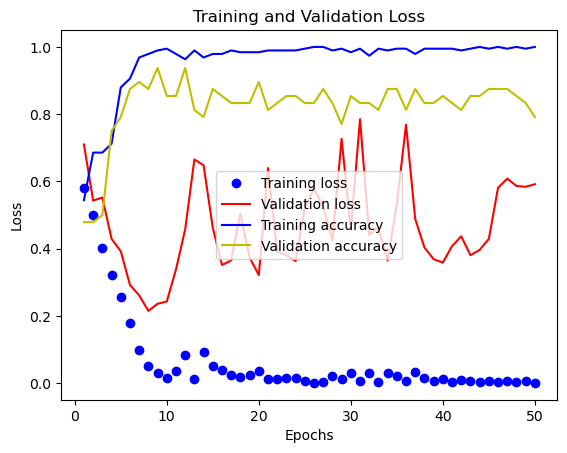

In [41]:
import matplotlib.pyplot as plt

def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'bo', label='Training loss')  # 'bo' for blue dots
    plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 'r' for solid red line
    plt.plot(epochs, acc,'b', label='Training accuracy')
    plt.plot(epochs, val_acc ,'y', label = 'Validation accuracy')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Assuming you have a 'history' object from your model's training process
plot_loss(history)


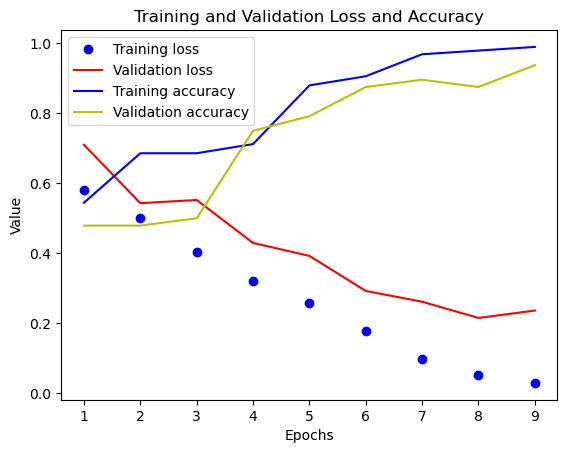

In [44]:
import matplotlib.pyplot as plt

def plot_loss(history):
    epochs_to_plot = 9  # Number of epochs to plot

    train_loss = history.history['loss'][:epochs_to_plot]
    val_loss = history.history['val_loss'][:epochs_to_plot]
    acc = history.history['accuracy'][:epochs_to_plot]
    val_acc = history.history['val_accuracy'][:epochs_to_plot]
    epochs = range(1, epochs_to_plot + 1)

    plt.plot(epochs, train_loss, 'bo', label='Training loss')  # 'bo' for blue dots
    plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 'r' for solid red line
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
    plt.title('Training and Validation Loss and Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()

    plt.show()

# Assuming you have a 'history' object from your model's training process
plot_loss(history)
